<h1><center>Pre Interview exercices</center></h1>

**Autor : Valentin Tran Nhu Gomey**

# Exercise 1

In this exercice our goal was to study the mRNA sequence of the NPM1 gene. First, we downloaded the Fasta file on NCBI:


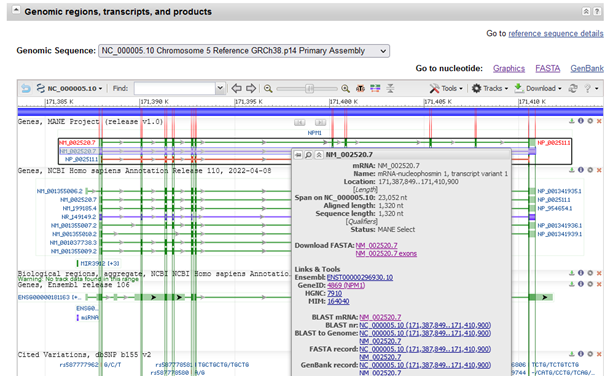

Then we import our Fasta file on Python 

In [2]:
from Bio import SeqIO
from Bio.SeqUtils import GC

In [4]:
for record in SeqIO.parse("arnm.fa", "fasta"):
    sequence = record.seq

## 1. *What is the length of the sequence in nucleotides? In codons?*


To find the length of the sequence in nucleotides we used the function **len**

In [5]:
print(len(sequence))

1320


To find the length of the sequence in codons we divided the last result by 3 

In [6]:
print((len(sequence)/3))

440.0


## 2. *What is the GC% of the sequence?*



We used the **GC** function :

In [13]:
print("{}%".format(round(GC(sequence),2)))

41.29%


## 3. *Is the CTTAGTAGCTGTGGAGGAA motif present in the sequence? If so, how many time? At which positition.s?*

We used the fonctions **fin** and **rfind**

In [14]:
print(sequence.find("CTTAGTAGCTGTGGAGGAA"))
print(sequence.rfind("CTTAGTAGCTGTGGAGGAA"))

444
444


We have the same number for the two fonctions so we can confirm that there is only one sequence and that the motif begins in the position **444**. 

# Exercise 2

In this exercise we are going to align two sequences, the one in the previous exercice and the new one call "exercise_2_sequence.fasta". 
We imported it :

## *How similar (or disimilar) are the two sequences? How can you quantify their similarity (or disimilarity) ?*

In [16]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


for record2 in SeqIO.parse("exercise_2_sequence.fasta", "fasta"):
    sequence2 = record2.seq

We used the pairwise2 module to align the two sequences. First we decided that a match worth 1 a dissmatch worth 0 and a gap 0 :

In [18]:
alignments = pairwise2.align.globalxx(sequence, sequence2)
for alignment in alignments:
    print(format_alignment(*alignment))

CTTTCCCTGGTGTGATTCCGTCCTGCGCGGTTGTTCTCTGGAGCAGCGTTCTTTTATCTCCGTCCGCCTTCTCTCCTACCTAAGTGCGTGCCGCCACCCGATGGAAGATTCGATGGACATGGACATGAGCCCCCTGAGGCCCCAGAACTATCTTTT-CGGTTGTGAACTAAAGGCCGACAAAGATTATCACTTTAAGGTGGATAATGATGAAAATGAGCACCAGTTATCTTTAAGAACGGTCAGTTTAGGGGCTGGTGCAAAGGATGAGTTGCACATTGTTGAAGCAGAGGCAATGAATTACGAAGGCAGTCCAATTAAAG-TAACACTGGCAACTTTGAAAATGTCTGTACAGCCAACGGTTTCC-CTTGGGGGCTTTGAAATAACACCACCAGTGGTCTTAAGGTTGAAGTGTGGTTCAGGGCCAGTGCATATTAGTGGACAGCACTTAGTAGCTGTGGAGGAAGATGCAGAGTCAGAAGATGAAGAGGAGGAGGATGTGAAACTCTTAAGTATATCTGGAAAGCGGTCTGCCCCTGGAGGTGGTAGCAAGGTTCCACAGAAAAAAGTAAAACTTGCTGCTGATGAAGATGATGACGATGATGATGAAGAGGATGATGATGAAGATGATGATGATGATGATTTTGATGATGAGGAAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCCAAAAATGCACAAAAGTCAAATCAGAATGGAAAAGACTC-AAAACCATCATCAACACCAAGATCAAAAGGACAAGAATCCTTCAAGAAACAGGAAAAAACTCCTAAAACACCAAAAGGACCTAGTTCTGTAGAAGACATTAAAGCAAAAATGCAAGCAAGTATAGAAAAAGGTGGTTCTCTTCCCAAAGTGGAAGCCAAATTCATCAATTATGTGAAGAATTGCTTCCGGATGACTGACCAAGAGGCTATTCAAGATCTCTGGCAGTGGAGGAAGTCTCTTTAAGAAAATAGTTT

For all alignment we obtained the same score which is 884. With that we can calculate the similarity percentage using this formula :

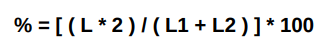

Where :
- L is the number of match
- L1 is the length of the first sequence
- L2 is the length of the second sequence
 <br/> We obtained : 

In [22]:
ls=884
l1= len(sequence)
l2 = len(sequence2)

similarite = ((ls*2)/(l1+l2))*100
print("{} %".format(round(similarite,2)))

80.07 %


Another method to estimate the difference between the two sequence is to calculate the distance score. So this time a match will be worth 0, a dissmatch -1 and a gap -2 :

In [23]:
alignments2 = pairwise2.align.globalms(sequence, sequence2, match =0, mismatch=-1, open=-2 ,extend=0 )
for alignment in alignments2:
    print(format_alignment(*alignment))

CTTTCCCTGGTGTGATTCCGTCCTGCGCGGTTGTTCTCTGGAGCAGCGTTCTTTTATCTCCGTCCGCCTTCTCTCCTACCTAAGTGCGTGCCGCCACCCGATGGAAGATTCGATGGACATGGACATGAGCCCCCTGAGGCCCCAGAACTATCTTTTCGGTTGTGAACTAAAGGCCGACAAAGATTATCACTTTAAGGTGGATAATGATGAAAATGAGCACCAGTTATCTTTAAGAACGGTCAGTTTAGGGGCTGGTGCAAAGGATGAGTTGCACATTGTTGAAGCAGAGGCAATGAATTACGAAGGCAGTCCAATTAAAGTAACACTGGCAACTTTGAAAATGTCTGTACAGCCAACGGTTTCCCTTGGGGGCTTTGAAATAACACCACCAGTGGTCTTAAGGTTGAAGTGTGGTTCAGGGCCAGTGCATATTAGTGGACAGCACTTAGTAGCTGTGGAGGAAGATGCAGAGTCAGAAGATGAAGAGGAGGAGGATGTGAAACTCTTAAGTATATCTGGAAAGCGGTCTGCCCCTGGAGGTGGTAGCAAGGTTCCACAGAAAAAAGTAAAACTTGCTGCTGATGAAGATGATGACGATGATGATGAAGAGGATGATGATGAAGATGATGATGATGATGATTTTGATGATGAGGAAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCCAAAAATGCACAAAAGTCAAATCAGAATGGAAAAGACTCAAAACCATCATCAACACCAAGATCAAAAGGACAAGAATCCTTCAAGAAACAGGAAAAAACTCCTAAAACACCAAAAGGACCTAGTTCTGTAGAAGACATTAAAGCAAAAATGCAAGCAAGTATAGAAAAAGGTGGTTCTCTTCCCAAAGTGGAAGCCAAATTCATCAATTATGTGAAGAATTGCTTCCGGATGACTGACCAAGAGGCTATTCAAGATCTCTGGCAGTGGAGGAAGTCTCTTTAAGAAAATAGTTTAAAC

We obtained a score of **-4**.